In [ ]:
#IMPORTING LIBRARIES
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#LOADING DATASET
pd.set_option('display.max_columns', None)
burnoutDf=pd.read_csv('/content/drive/MyDrive/employee_burnout_analysis.csv')
burnoutDf

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,0,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,1,3,0.0,0.41
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6,6.7,0.59
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7,0.0,0.72
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,2,5,5.9,0.52


OPERATIONS ON DATASET

In [ ]:
burnoutDf["Date of Joining"]=pd.to_datetime(burnoutDf["Date of Joining"])

In [ ]:
burnoutDf.shape

(22750, 9)

In [ ]:
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   22750 non-null  int64         
 7   Mental Fatigue Score  22750 non-null  float64       
 8   Burn Rate             22750 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.6+ MB


In [ ]:
burnoutDf.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7,6.9,0.52


In [ ]:
burnoutDf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
burnoutDf.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
burnoutDf.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
22745    False
22746    False
22747    False
22748    False
22749    False
Length: 22750, dtype: bool>

In [ ]:
burnoutDf.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.209363,5.195152,0.429673
std,1.135145,2.254284,2.472973,0.216675
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,4.000000,0.290000
50%,2.000000,4.000000,5.600000,0.440000
75%,3.000000,6.000000,6.900000,0.580000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
for i,col in enumerate(burnoutDf.columns):
  print(f"\n\n{burnoutDf[col].unique()}")
  print(f"\n{burnoutDf[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-03-10T00:00:00.000000000' '2008-11-03T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-01-02T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-03-09T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-05-12T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [ ]:
burnoutDf=burnoutDf.drop(['Employee ID'],axis=1)

In [ ]:
intFloatburnoutDf=burnoutDf.select_dtypes([np.int,np.float])
for i, col in enumerate(intFloatburnoutDf.columns):
  if(intFloatburnoutDf[col].skew() >=0.1):
    print("\n",col,"Feature is Positively Skewed and value is: ", intFloatburnoutDf[col].skew())
  elif(intFloatburnoutDf[col].skew() >= -0.1):
    print("\n",col,"Feature is Negatively Skewed and value is: ", intFloatburnoutDf[col].skew())
  else:
    print("\n",col,"Feature is Normally Distributed and value is: ", intFloatburnoutDf[col].skew())


 Designation Feature is Negatively Skewed and value is:  0.09242138478903683

 Resource Allocation Feature is Negatively Skewed and value is:  0.03076770484319346

 Mental Fatigue Score Feature is Normally Distributed and value is:  -0.6830437671171495

 Burn Rate Feature is Normally Distributed and value is:  -0.10497233720711902


In [ ]:
#Replace the null values with mean
burnoutDf['Resource Allocation'].fillna(burnoutDf['Resource Allocation'].mean(),inplace=True)
burnoutDf['Mental Fatigue Score'].fillna(burnoutDf['Mental Fatigue Score'].mean(),inplace=True)
burnoutDf['Burn Rate'].fillna(burnoutDf['Burn Rate'].mean(),inplace=True)

In [ ]:
#check for null values
burnoutDf.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
#plotting Heat map to check Correlation
Corr=burnoutDf.corr()
sns.set(rc={'figure.figsize':(14,12)})
fig = px.imshow(Corr, text_auto=True, aspect="auto")
fig.show()

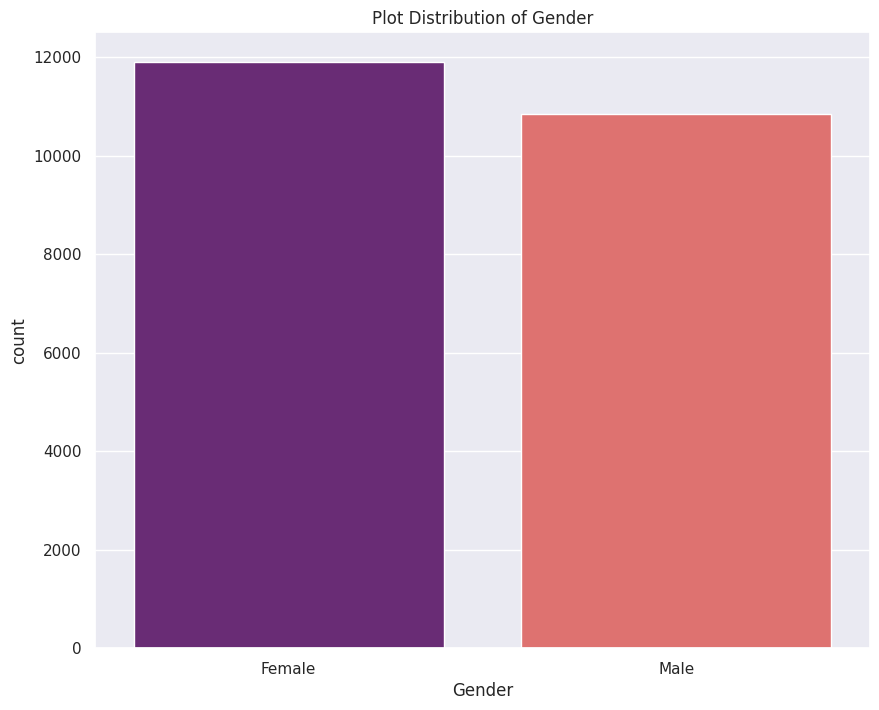

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender", data=burnoutDf, palette="magma")
plt.title("Plot Distribution of Gender")
plt.show()

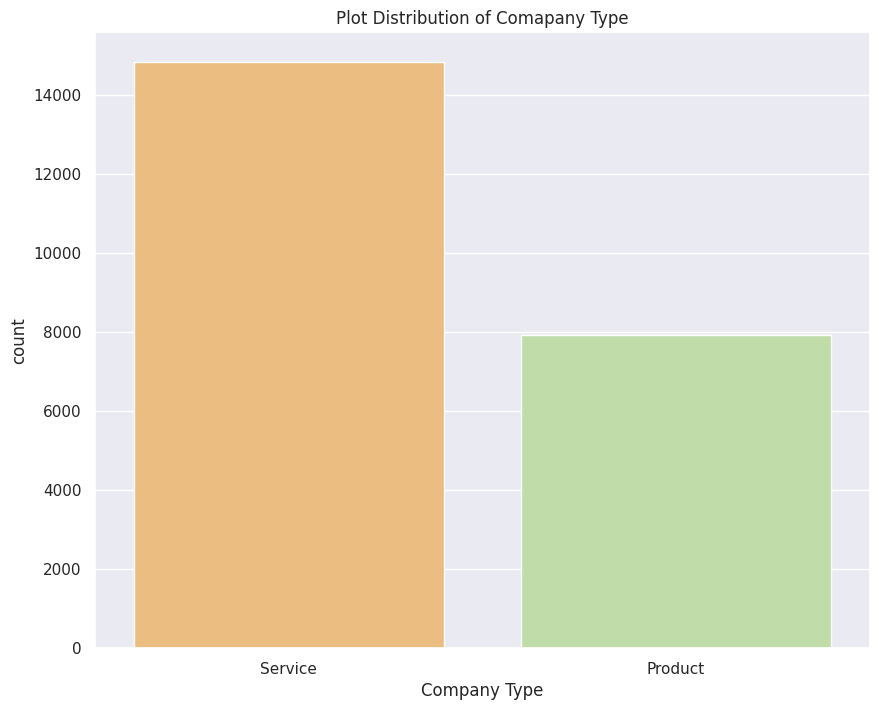

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type", data=burnoutDf, palette="Spectral")
plt.title("Plot Distribution of Comapany Type")
plt.show()


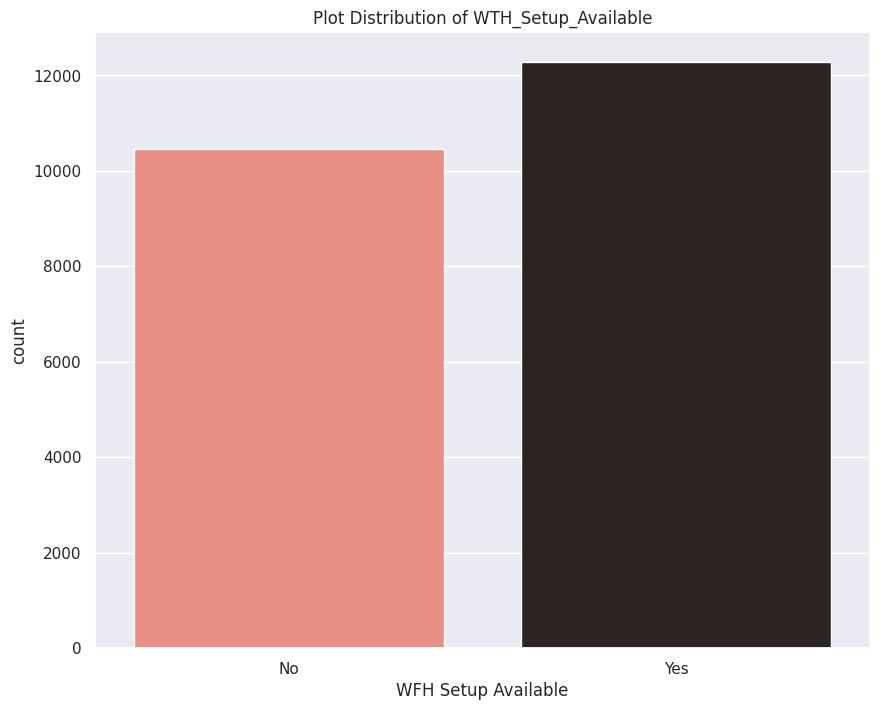

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available",data=burnoutDf, palette="dark:salmon_r")
plt.title("Plot Distribution of WTH_Setup_Available")
plt.show()

In [ ]:
burn_st=burnoutDf.loc[:,'Date of Joining':'Burn Rate']
burn_st=burn_st.select_dtypes([int, float])
for i, col in enumerate(burn_st.columns):
  fig=px.histogram(burn_st, x=col, title="Plot Distribution of"+col, color_discrete_sequence=['indianred'])
  fig.update_layout(bargap=0.2)
  fig.show()

In [ ]:
fig=px.line(burnoutDf, y="Burn Rate", color="Designation", title="Burn rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig=px.line(burnoutDf, y="Mental Fatigue Score", color="Designation",title="Mental Fatigue vas Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

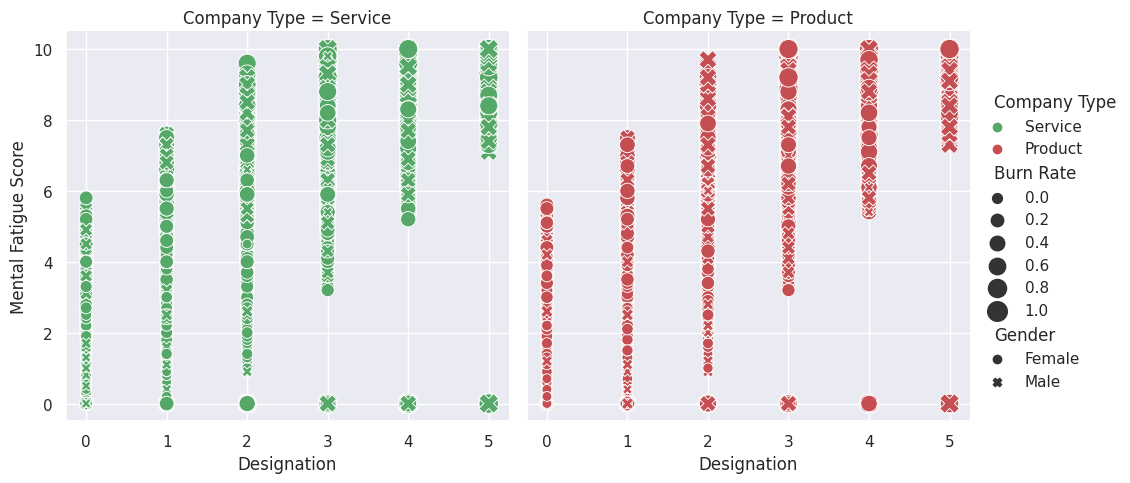

In [ ]:
sns.relplot(
    data=burnoutDf, x="Designation", y="Mental Fatigue Score", col="Company Type",
    hue="Company Type", size="Burn Rate", style="Gender",
    palette=["g","r"], sizes=(50,200)
)

In [ ]:
#LABEL ENCODING
from sklearn import preprocessing
Label_encode=preprocessing.LabelEncoder()


In [ ]:
#Assign in new variable
burnoutDf['GenderLabel'] = Label_encode.fit_transform(burnoutDf['Gender'].values)
burnoutDf['Company_TypeLabel'] = Label_encode.fit_transform(burnoutDf['Company Type'].values)
burnoutDf['WFH_Setup_AvailableLabel'] = Label_encode.fit_transform(burnoutDf['WFH Setup Available'].values)


In [ ]:
gn = burnoutDf.groupby("Gender")
gn = gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [ ]:
ct=burnoutDf.groupby('Company Type')
ct = ct['Company_TypeLabel']
ct.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [ ]:
wsa=burnoutDf.groupby('WFH Setup Available')
wsa=wsa['WFH_Setup_AvailableLabel']
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64

In [ ]:
burnoutDf.tail(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
22740,2008-09-05,Female,Product,No,3,6,7.3,0.55,0,0,0
22741,2008-01-07,Male,Product,No,2,5,6.0,0.00,1,0,0
22742,2008-07-28,Male,Product,No,3,5,8.1,0.69,1,0,0
22743,2008-12-15,Female,Product,Yes,1,3,6.0,0.48,0,0,1
22744,2008-05-27,Male,Product,No,3,7,6.2,0.54,1,0,0
22745,2008-12-30,Female,Service,No,1,3,0.0,0.41,0,1,0
22746,2008-01-19,Female,Product,Yes,3,6,6.7,0.59,0,0,1
22747,2008-11-05,Male,Service,Yes,3,7,0.0,0.72,1,1,1
22748,2008-01-10,Female,Service,No,2,5,5.9,0.52,0,1,0
22749,2008-01-06,Male,Product,No,3,6,7.8,0.61,1,0,0


In [ ]:
#FEATURE SELECTION
Columns=['Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'GenderLabel', 'Company_TypeLabel',
       'WFH_Setup_AvailableLabel']
X=burnoutDf[Columns]
y=burnoutDf['Burn Rate']

In [ ]:
print(burnoutDf.columns)
print(X)


Index(['Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available',
       'Designation', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'GenderLabel', 'Company_TypeLabel',
       'WFH_Setup_AvailableLabel'],
      dtype='object')
       Gender Company Type WFH Setup Available  Designation  \
0      Female      Service                  No            2   
1        Male      Service                 Yes            1   
2      Female      Product                 Yes            2   
3        Male      Service                 Yes            1   
4      Female      Service                  No            3   
...       ...          ...                 ...          ...   
22745  Female      Service                  No            1   
22746  Female      Product                 Yes            3   
22747    Male      Service                 Yes            3   
22748  Female      Service                  No            2   
22749    Male      Product                  No   

In [ ]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


In [ ]:
#IMPLEMENTING PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [ ]:

# Define the columns containing categorical variables
categorical_columns = ['Gender', 'Company Type', 'WFH Setup Available']

# Define the columns you want to include in the PCA analysis
selected_columns = ['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']

# Extract the relevant columns from the DataFrame
X = burnoutDf[selected_columns + categorical_columns]

# Perform one-hot encoding on the categorical columns
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_column_names)

# Concatenate the encoded features with the numerical features
X_processed = pd.concat([X[selected_columns], X_encoded_df], axis=1)

pca = PCA(0.95)
X_pca = pca.fit_transform(X_processed)

print("PCA shape of X is: ", X_pca.shape, "and the original shape is: ", X_processed.shape)
print("% of importance of selected features:", pca.explained_variance_ratio_)
print("The number of features selected through PCA is:", pca.n_components_)


PCA shape of X is:  (22750, 5) and the original shape is:  (22750, 10)
% of importance of selected features: [0.65529593 0.20853399 0.03626026 0.0340748  0.03240546]
The number of features selected through PCA is: 5


In [ ]:
#DATA SPLITTING
from sklearn.model_selection import train_test_split
X_train_pca, X_test, Y_train, Y_test =  train_test_split(X_pca,y, test_size = 0.25, random_state=10)


In [ ]:
print(X_train_pca.shape, X_test.shape, Y_train.shape, Y_test.shape)

(17062, 5) (5688, 5) (17062,) (5688,)


In [ ]:
#MODEL IMPLEMENTATION RANDOM FOREST REGRESSOR
from sklearn.metrics import r2_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor()
rf_model.fit(X_train_pca, Y_train)

train_pred_rf = rf_model.predict(X_train_pca)
train_r2 = r2_score(Y_train, train_pred_rf)
test_pred_rf = rf_model.predict(X_test)
test_r2 = r2_score(Y_test, test_pred_rf)

print("Accuracy score of the train data: " + str(round(100 * train_r2, 4)) + "%")
print("Accuracy score of the test data: " + str(round(100 * test_r2, 4)) + "%")


Accuracy score of the train data: 97.1687%
Accuracy score of the test data: 78.2335%


In [ ]:
#ADA BOOST REGRESSOR
from sklearn.ensemble import AdaBoostRegressor
abr_model = AdaBoostRegressor()
abr_model.fit(X_train_pca, Y_train)

train_pred_adboost = abr_model.predict(X_train_pca)
train_r2 = r2_score(Y_train, train_pred_adboost)
test_pred_adboost = abr_model.predict(X_test)
test_r2 = r2_score(Y_test, test_pred_adboost)
print("Accuracy score of the train data: " + str(round(100 * train_r2, 4)) + "%")
print("Accuracy score of the test data: " + str(round(100 * test_r2, 4)) + "%")

Accuracy score of the train data: 27.9761%
Accuracy score of the test data: 27.1272%
